In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

In [2]:
depression_embeds = np.load("/kaggle/input/depression-embeds/depression_embed.npy")

tweet_df = pd.read_csv("/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv")
depression_labels = tweet_df["label (depression result)"].to_numpy()

In [3]:
emotion_embeds = np.load("/kaggle/input/emotions-450k/combined.npy")

emotion_df = pd.read_csv("/kaggle/input/emotions-450k/combined_df.csv")
emotion_labels = emotion_df["Label"].to_numpy()

In [4]:
N = 5000

depression_idx = np.random.choice(np.arange(0, len(depression_embeds)), N, replace=False)
depression_embeds = depression_embeds[depression_idx]
depression_labels = depression_labels[depression_idx]

emotion_idx = np.random.choice(np.arange(0, len(emotion_embeds)), N, replace=False)
emotion_embeds = emotion_embeds[emotion_idx]
emotion_labels = emotion_labels[emotion_idx]

In [5]:
# Let 0 to be no depression, 1 to be depression and 2...7 to be the emotion classes
emotion_labels = emotion_labels + 2

depression_labels = depression_labels.reshape([len(depression_labels), 1])
emotion_labels = emotion_labels.reshape([len(emotion_labels), 1])

embeds = np.vstack([depression_embeds, emotion_embeds])
labels = np.vstack([depression_labels, emotion_labels])

In [6]:
embeds_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, verbose=2).fit_transform(embeds)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 17.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 121.1401138, gradient norm = 0.0135220 (50 iterations in 6.148s)
[t-SNE] 

  0%|          | 0/10000 [00:00<?, ?it/s]

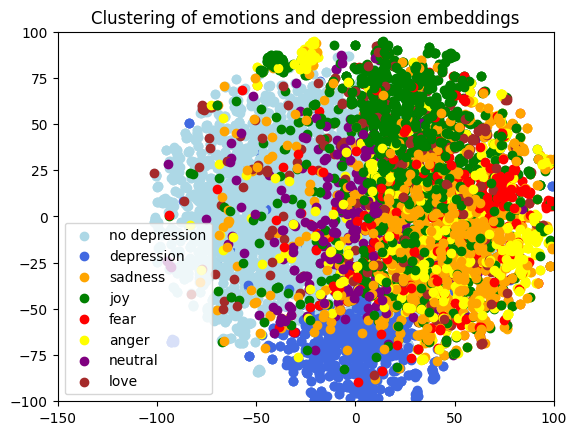

In [7]:
colors = ["lightblue", "royalblue", "green", "red", "yellow", "orange", "purple", "brown"]
legend = ["no depression", "depression", "joy", "fear", "anger", "sadness", "neutral", "love"]
used_legend = []

for embed, label in tqdm(zip(embeds_tsne, labels), total=(len(labels))):
    plot_label = legend[label[0]]
    
    if plot_label not in used_legend:
        used_legend.append(plot_label)
    else: 
        plot_label = ""
        
    plt.scatter(embed[0], embed[1], color=colors[label[0]], label=plot_label)
    
plt.legend()
plt.xlim([-150, 100])
plt.ylim([-100, 100])
plt.title("Clustering of emotions and depression embeddings")
plt.show()